In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create set of random lat and long combos
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add lats and longs into a list
coordinates = list(lat_lngs)
coordinates

[(66.62534619698624, 101.89326458291208),
 (-17.238944630247147, 106.65873744917724),
 (-67.60910533414524, 46.07484463572948),
 (74.04939030644246, 136.00831446877686),
 (25.839810145611253, -155.85125551761834),
 (52.930833397790224, -151.60455312789443),
 (17.727888555685894, 129.572254218411),
 (53.775233353165476, -104.49494123538142),
 (86.48418425109293, -67.53510687073145),
 (-19.92572772607363, -51.06298132150951),
 (-70.88621789168539, 174.88100019619225),
 (-87.47023585399701, 67.34356708142147),
 (3.1210596441117957, 164.4899442085927),
 (5.989911438319041, 44.83886867925918),
 (-22.945131379136328, 92.03539928712445),
 (-88.37532503428493, -176.54116379058883),
 (-19.5862979348601, -76.30759288920343),
 (56.45883999384952, -154.26192500178382),
 (77.68735725999267, 84.77543340011835),
 (63.19474830457753, 34.53260905627789),
 (-73.45934958620366, 103.99789742730906),
 (27.64786863263592, 5.9749389635233285),
 (89.68509631681638, 62.348294443680146),
 (13.603406075131588, 8

In [4]:
from citipy import citipy
#create cities list
cities = []
#Identify the nearest city for each coord
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    #If city is unique, append to cities list
    if city not in cities:
        cities.append(city)
#PRint the city count to confirm
len(cities)

613

In [5]:
#Import the requests library
import requests

#Import APi key
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
#Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=abd8f4167b9af760ee5638a555934296&q=Boston


In [8]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather


<Response [200]>

In [9]:
# Get the text of the 'Get' request.
city_weather.text


'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":32.38,"feels_like":21.31,"temp_min":29.57,"temp_max":33.91,"pressure":1009,"humidity":51},"visibility":10000,"wind":{"speed":17.27,"deg":270,"gust":28.77},"clouds":{"all":1},"dt":1638060509,"sys":{"type":1,"id":3486,"country":"US","sunrise":1638013791,"sunset":1638047668},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [10]:
# Get the JSON text of the 'Get' request.
city_weather.json()


{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 32.38,
  'feels_like': 21.31,
  'temp_min': 29.57,
  'temp_max': 33.91,
  'pressure': 1009,
  'humidity': 51},
 'visibility': 10000,
 'wind': {'speed': 17.27, 'deg': 270, 'gust': 28.77},
 'clouds': {'all': 1},
 'dt': 1638060509,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1638013791,
  'sunset': 1638047668},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")


City Weather found.


In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")


City weather not found.


In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 32.38,
  'feels_like': 21.31,
  'temp_min': 29.57,
  'temp_max': 33.91,
  'pressure': 1009,
  'humidity': 51},
 'visibility': 10000,
 'wind': {'speed': 17.27, 'deg': 270, 'gust': 28.77},
 'clouds': {'all': 1},
 'dt': 1638060509,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1638013791,
  'sunset': 1638047668},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
#Get JSON data
boston_data  = city_weather.json()
boston_data["sys"]["country"]

'US'

In [15]:
boston_data["dt"]

1638060509

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 33.91 51 1 17.27


In [17]:
#Import the datetime module from datetime library
from datetime import datetime

#give the date from the JSON file
date = boston_data["dt"]

#Convert the UTC date to a date format with y,  m, d, h, ms, s
datetime.utcfromtimestamp(date).strftime("%Y-%m-%d %H:%M:%S")

'2021-11-28 00:48:29'

In [18]:
#Create an empty list to hold the weather data
city_data = []

#Import time
import time
#Print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

#Create counters
record_count = 1
set_count =1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if(i%50==0 and i>=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #Create end point URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the url , record and set numbers and the city
    print(f"Processing Record { record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count
    record_count +=1    
          
#Run an APT request for each of the cities
    try:
    #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #PArse the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Conver the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H-%M-%S')
        #Append the city information to city_data list
        city_data.append({"City": city.title(),
                   "Lat": city_lat,
                   "Lng": city_lng,
                   "Max Temp": city_max_temp,
                   "Humidity": city_humidity,
                   "Cloudiness": city_clouds,
                   "Wind Speed": city_wind,
                   "Country": city_country,
                   "Date": city_date})
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
  
# Indicate that data loading is complete
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | tura
Processing Record 2 of Set 1 | srandakan
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | kailua
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | payo
Processing Record 8 of Set 1 | nipawin
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | aparecida do taboado
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | xuddur
Processing Record 15 of Set 1 | labuhan
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | acari
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | pindushi
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | warqla
City not found. Skipping...
Processing Record 2

Processing Record 39 of Set 4 | lubsko
Processing Record 40 of Set 4 | lebu
Processing Record 41 of Set 4 | red bank
Processing Record 42 of Set 4 | kouroussa
Processing Record 43 of Set 4 | gamovo
Processing Record 44 of Set 4 | mildura
Processing Record 45 of Set 4 | chikitigarh
Processing Record 46 of Set 4 | victor harbor
Processing Record 47 of Set 4 | bredasdorp
Processing Record 48 of Set 4 | vanavara
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | batagay
Processing Record 1 of Set 5 | isla aguada
Processing Record 2 of Set 5 | santa rosa
Processing Record 3 of Set 5 | geraldton
Processing Record 4 of Set 5 | mpanda
Processing Record 5 of Set 5 | zemio
Processing Record 6 of Set 5 | meulaboh
Processing Record 7 of Set 5 | harlingen
Processing Record 8 of Set 5 | handan
Processing Record 9 of Set 5 | husum
Processing Record 10 of Set 5 | warrnambool
Processing Record 11 of Set 5 | punta gorda
Processing Record 12 of Set 5 | ugoofaaru
Processing Record 13

Processing Record 30 of Set 8 | hearst
Processing Record 31 of Set 8 | belmonte
Processing Record 32 of Set 8 | chumikan
Processing Record 33 of Set 8 | blyznyuky
Processing Record 34 of Set 8 | yasnogorsk
Processing Record 35 of Set 8 | hoquiam
Processing Record 36 of Set 8 | vao
Processing Record 37 of Set 8 | bilma
Processing Record 38 of Set 8 | katherine
Processing Record 39 of Set 8 | paslek
Processing Record 40 of Set 8 | assen
Processing Record 41 of Set 8 | khatanga
Processing Record 42 of Set 8 | waw
Processing Record 43 of Set 8 | bambanglipuro
Processing Record 44 of Set 8 | meshchovsk
Processing Record 45 of Set 8 | san nicolas
Processing Record 46 of Set 8 | isangel
Processing Record 47 of Set 8 | lolua
City not found. Skipping...
Processing Record 48 of Set 8 | sola
Processing Record 49 of Set 8 | talnakh
Processing Record 50 of Set 8 | papetoai
Processing Record 1 of Set 9 | yulara
Processing Record 2 of Set 9 | cabo san lucas
Processing Record 3 of Set 9 | ilulissat
Pr

Processing Record 16 of Set 12 | krasnokamensk
Processing Record 17 of Set 12 | kieta
Processing Record 18 of Set 12 | sao jose da coroa grande
Processing Record 19 of Set 12 | mitsamiouli
Processing Record 20 of Set 12 | goryachiy klyuch
Processing Record 21 of Set 12 | mehamn
Processing Record 22 of Set 12 | nguiu
City not found. Skipping...
Processing Record 23 of Set 12 | bahua
Processing Record 24 of Set 12 | rocha
Processing Record 25 of Set 12 | ndago
Processing Record 26 of Set 12 | kavaratti
Processing Record 27 of Set 12 | teguise
Processing Record 28 of Set 12 | kisangani
Processing Record 29 of Set 12 | guarapari
Processing Record 30 of Set 12 | qujing
Processing Record 31 of Set 12 | ricse
Processing Record 32 of Set 12 | wangou
Processing Record 33 of Set 12 | bose
Processing Record 34 of Set 12 | opuwo
Processing Record 35 of Set 12 | brae
Processing Record 36 of Set 12 | rosita
Processing Record 37 of Set 12 | hornepayne
Processing Record 38 of Set 12 | tondon
Processin

In [20]:
# Conver the array of dictionaries to a PD Df
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tura,25.5198,90.2201,58.98,74,38,3.13,IN,2021-11-28 00-58-00
1,Srandakan,-7.9386,110.2506,76.93,88,100,4.70,ID,2021-11-28 00-58-01
2,Port Alfred,-33.5906,26.8910,66.07,71,96,9.82,ZA,2021-11-28 00-58-02
3,Kailua,21.4022,-157.7394,80.58,69,0,6.64,US,2021-11-28 00-58-03
4,Kodiak,57.7900,-152.4072,14.50,75,64,12.46,US,2021-11-28 00-55-14


In [21]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tura,IN,2021-11-28 00-58-00,25.5198,90.2201,58.98,74,38,3.13
1,Srandakan,ID,2021-11-28 00-58-01,-7.9386,110.2506,76.93,88,100,4.70
2,Port Alfred,ZA,2021-11-28 00-58-02,-33.5906,26.8910,66.07,71,96,9.82
3,Kailua,US,2021-11-28 00-58-03,21.4022,-157.7394,80.58,69,0,6.64
4,Kodiak,US,2021-11-28 00-55-14,57.7900,-152.4072,14.50,75,64,12.46
5,Payo,ID,2021-11-28 00-58-04,-3.7508,103.6372,73.99,73,100,1.86
6,Nipawin,CA,2021-11-28 00-58-04,53.3668,-104.0009,23.04,63,1,11.50
7,Qaanaaq,GL,2021-11-28 00-52-27,77.4840,-69.3632,-0.54,98,98,1.90
8,Aparecida Do Taboado,BR,2021-11-28 00-58-05,-20.0867,-51.0936,81.03,49,57,2.64
9,Kaitangata,NZ,2021-11-28 00-56-28,-46.2817,169.8464,61.39,54,0,7.40


In [27]:
#create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the cityDaty into CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [30]:
#Extract Relevant Fields from the DataFrame for plotting
lats= city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

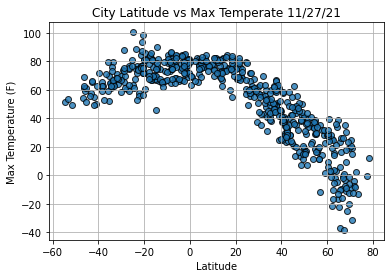

In [31]:
#Impor time Module
import time

#Build the scatter plot for lat vs max temp
plt.scatter(lats, max_temps, edgecolor = "black", linewidths=1, marker = "o", alpha = 0.8, label = "Cities")
plt.title(f"City Latitude vs Max Temperate "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the Figure
plt.savefig("weather_Data/Fig1.png")

# Show the plot
plt.show()

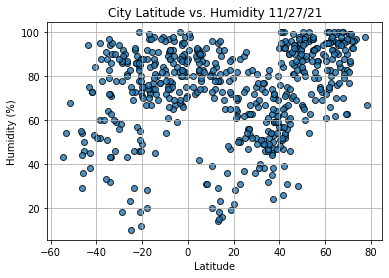

In [32]:
#Repeat plot for other metrics
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

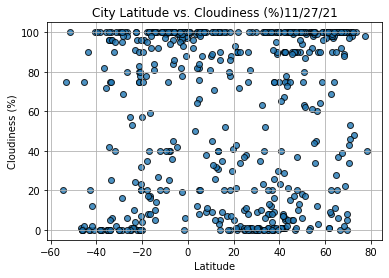

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%)"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

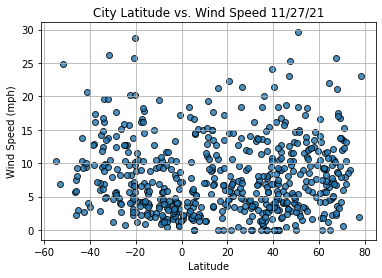

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
